# Paired comparison of consensusTME PCs in NACT samples

Script related to figure s5

Aim:
- Compare consensusTME NES PCA loadings pre vs post NACT

## Import packages

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA

In [2]:
home='~/Documents/PhD/Software/Scripts/OVCT/1.REBUTTAL/0.Figures/5' # home

## Get sample labels

### Load file

In [3]:
file_keys = home+'/1.Data/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


## Load ssGSEA results

In [4]:
file_nes = home+'/1.Data/ConsensusTME_NACT_NES.txt'

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
B_cells,0.254477,0.183183,0.328434,0.222920,0.158446,0.208608,0.153616,0.241499,0.227171,0.243108,...,0.282397,0.200239,0.268572,0.135625,0.237829,0.174235,0.346601,0.451349,0.345059,0.261922
Cytotoxic_cells,0.160124,0.086828,0.250783,0.469283,0.149997,0.280421,0.183015,0.136132,-0.013996,-0.005431,...,0.119812,0.128451,0.053743,-0.061381,0.264916,0.130406,0.056087,0.426493,0.242746,0.000835
Dendritic_cells,0.234120,0.242725,0.358290,0.249668,0.096655,0.219568,0.186520,0.244219,0.175394,0.125974,...,0.195455,0.213759,0.300447,0.175864,0.352042,0.078574,0.344772,0.479416,0.396381,0.237165
Endothelial,0.141871,-0.031062,0.359779,0.385954,-0.038934,0.295855,-0.023180,0.343295,0.143790,0.186743,...,0.214454,0.263538,0.230676,0.182908,0.467953,0.115959,0.192065,0.339805,0.233110,0.231086
Eosinophils,-0.104190,-0.001942,0.118276,0.292186,-0.136142,-0.127744,0.022336,0.303864,-0.069590,0.074915,...,-0.178187,-0.153298,0.104774,-0.223999,0.083588,-0.064987,0.086109,0.351228,0.080969,0.007399


### Check empty cells

In [5]:
set(data_nes.isnull().sum())

{0}

### Separate matched and unmatched samples

In [6]:
matched = [3368,371,9717,8674,2359,564,7765,6965,9347]

matched_df = sample_labels[sample_labels['Case_mRNA'].isin(matched)]

unmatched_df = sample_labels[~sample_labels['Case_mRNA'].isin(matched)]

In [7]:
matched_nes_df = data_nes[matched_df.index]

unmatched_nes_df = data_nes[unmatched_df.index]

## Calculate matched PCA

In [8]:
pca = PCA(n_components=7)
pca_nes = pca.fit_transform(matched_nes_df.transpose())
len(pca_nes) # check number of data points

18

In [9]:
matched_nes_df = matched_nes_df.T
matched_nes_df.head()

Term,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells
A01,0.254477,0.160124,0.234120,0.141871,-0.104190,0.092419,0.267011,0.172090,0.181448,0.021926,0.230488,-0.020415,0.109183,0.326882,-0.151260,-0.124588,-0.121056,-0.171317
A02,0.183183,0.086828,0.242725,-0.031062,-0.001942,0.093467,0.283663,0.104845,0.196052,-0.115812,0.259149,-0.025268,0.248861,0.483244,-0.172278,-0.099327,-0.110020,-0.176621
A03,0.328434,0.250783,0.358290,0.359779,0.118276,0.304250,0.409127,0.295066,0.321067,0.041039,0.385862,0.020209,0.301314,0.484968,0.154900,0.098996,0.020995,0.124944
A04,0.222920,0.469283,0.249668,0.385954,0.292186,0.499391,0.284822,0.218594,0.312852,0.306526,0.320554,0.170785,0.433240,0.512587,0.069036,0.082092,0.065898,0.077918
A05,0.158446,0.149997,0.096655,-0.038934,-0.136142,0.034149,0.230793,0.127381,0.204350,-0.153834,0.200675,-0.097319,0.264777,0.253428,-0.212100,-0.169720,-0.180424,-0.287924


## Violinplots of PCs with matched lines and statistical analysis

In [10]:
pcx = 0

In [11]:
pre = []
pre_label = []
pos = []
pos_label = []
for i,s in enumerate(matched_nes_df.index):
    
    x = pca_nes[:, pcx][i]
    l = sample_labels['Case_mRNA'][s]
    
    if sample_labels['NACT'][s] == 'Untreated':
        pre.append(x)
        pre_label.append('pre')
        
    else:
        pos.append(x)
        pos_label.append('pos')

In [12]:
pc = pre+pos
pc_label = pre_label+pos_label

In [13]:
bxplot_data = pd.DataFrame({'pc':pc, 'pc_label':pc_label})

### Plot

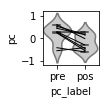

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(1,1)

sns.violinplot(x="pc_label",
               y="pc",
               data=bxplot_data,
               inner=None,
               color=".8",
               width=1,
               zorder=0)

sns.boxplot(x='pc_label',
            y='pc',
            data=bxplot_data,
            notch=True,
            fliersize=0,
            width=0.5, 
            zorder=1)

for i,s in enumerate(matched_nes_df.index):
    
    y = pca_nes[:, pcx][i]
    l = sample_labels['Case_mRNA'][s]
    
    if i%2 == 0:
        x = 0
        line = [(x,y)]
        
    else:
        x = 1
        line.append((x,y))
        (xs, ys) = zip(*line)
        
        if sample_labels['Case_mRNA'][s] in matched:                    
            ax.add_line(Line2D(xs, ys, ls='-', linewidth=1, color='k',alpha=1,zorder=2))
            
        else:
            ax.add_line(Line2D(xs, ys, ls='-', linewidth=1, color='k',alpha=1,zorder=2))
            

In [ ]:
fig = ax.get_figure()
filename = '../2.Plots/NACT_matched_ConsensusTME_PC%i_BxPlot.pdf' % pcx
fig.savefig(filename, bbox_inches='tight')

### Stastical analysis of pre vs post NACT PCs

In [16]:
import scipy.stats

p_values = []
for pcx in range(7):

    pre = []
    pos = []    
    for i,s in enumerate(matched_nes_df.index):
        
        x = pca_nes[:, pcx][i]
        l = sample_labels['Case_mRNA'][s]

        if sample_labels['NACT'][s] == 'Untreated':
            pre.append(x)

        else:
            pos.append(x)
            
    print(str(pcx)+"\n")
    
    n1 = scipy.stats.shapiro(pre)[1]
    n2 = scipy.stats.shapiro(pos)[1]
    
    n3 = scipy.stats.normaltest(pre)[1]
    n4 = scipy.stats.normaltest(pos)[1]
    
    n5 = scipy.stats.anderson(pre)
    n6 = scipy.stats.anderson(pos)
    
    if min([n1,n2]) < 0.05: # it's not normal

        print("NOT normal")

        h1 = scipy.stats.levene(pre, pos)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
            #print(h1)
        else:
            print("HOMOscedastic\n")

    else:

        print("Normal")

        h1 = scipy.stats.bartlett(pre,pos)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
        else:
            print("HOMOscedastic\n")
            
    if min([n1,n2,h1]) < 0.05:

        print("WILCOXON")

        print(scipy.stats.wilcoxon(pre,pos))
        
        stat, p_val = scipy.stats.wilcoxon(pre,pos)

    else:

        print("anderson")

        print(n5[0], n5[1])
        print(n6[0], n6[1])
        print("\n")

        print("PAIRED T-TEST")
        print(scipy.stats.ttest_rel(pre,pos))

        print("\n")
        
        stat, p_val = scipy.stats.ttest_rel(pre,pos)
                
    p_values.append((str(pcx),stat,p_val))

0

NOT normal
HOMOscedastic

WILCOXON
WilcoxonResult(statistic=3.0, pvalue=0.020879263166351643)
1

Normal
HOMOscedastic

anderson
0.27061804432818626 [0.507 0.578 0.693 0.808 0.961]
0.5417970880323324 [0.507 0.578 0.693 0.808 0.961]


PAIRED T-TEST
Ttest_relResult(statistic=-0.1958545434244592, pvalue=0.8496073688935719)


2

Normal
HETEROscedastic

WILCOXON
WilcoxonResult(statistic=21.0, pvalue=0.8589549227374824)
3

Normal
HOMOscedastic

anderson
0.2817241713714509 [0.507 0.578 0.693 0.808 0.961]
0.27599715882142206 [0.507 0.578 0.693 0.808 0.961]


PAIRED T-TEST
Ttest_relResult(statistic=0.6015369970679411, pvalue=0.5641354339525583)


4

Normal
HOMOscedastic

anderson
0.22834118155760663 [0.507 0.578 0.693 0.808 0.961]
0.2904416896916029 [0.507 0.578 0.693 0.808 0.961]


PAIRED T-TEST
Ttest_relResult(statistic=0.5531733999724286, pvalue=0.5952608580444774)


5

Normal
HOMOscedastic

anderson
0.20856141407072926 [0.507 0.578 0.693 0.808 0.961]
0.2723854227923539 [0.507 0.578 0.693 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: U

In [17]:
p_values

[('0', 3.0, 0.020879263166351643),
 ('1', -0.1958545434244592, 0.8496073688935719),
 ('2', 21.0, 0.8589549227374824),
 ('3', 0.6015369970679411, 0.5641354339525583),
 ('4', 0.5531733999724286, 0.5952608580444774),
 ('5', -1.0134030540129904, 0.34053307980334274),
 ('6', -0.38054257030339467, 0.7134481946583635)]

## Calculate unmatched PCA

In [18]:
pca = PCA(n_components=7)
pca_nes = pca.fit_transform(unmatched_nes_df.transpose())
len(pca_nes) # check number of data points

38

In [19]:
unmatched_nes_df = unmatched_nes_df.T
unmatched_nes_df.head()

Term,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells
B08,0.249800,0.145456,0.224033,0.202164,-0.152162,-0.036519,0.348417,0.256712,0.202752,-0.019068,0.232398,-0.069109,0.186257,0.465531,-0.164018,-0.103300,-0.106471,-0.165590
B09,0.193301,0.010064,0.168400,0.083503,0.050038,0.143070,0.274590,0.168830,0.176430,-0.050408,0.212820,-0.150952,0.255350,0.508211,-0.186047,-0.163291,-0.195858,-0.183883
B10,0.269692,0.162681,0.337810,0.361893,0.315413,0.235466,0.450285,0.242155,0.438709,0.364890,0.383685,-0.064943,0.411514,0.614522,-0.064545,0.058883,0.002355,-0.053964
B11,0.308057,0.043398,0.248438,0.279374,0.154184,0.266618,0.291016,0.215264,0.212004,0.102407,0.261785,-0.035059,0.256420,0.457790,-0.083453,-0.062882,-0.079102,-0.092499
B12,0.121856,-0.010168,-0.044533,0.108087,-0.314087,0.052442,0.184025,-0.004390,0.098196,-0.312022,0.069836,-0.235818,0.044286,0.321298,-0.311606,-0.245356,-0.305153,-0.279846


## Violinplots of PCs with unmatched lines and statistical analysis


In [20]:
pcx = 0

In [21]:
pre = []
pre_label = []
pos = []
pos_label = []
for i,s in enumerate(unmatched_nes_df.index):
    
    x = pca_nes[:, pcx][i]
    l = sample_labels['Case_mRNA'][s]
    
    if sample_labels['NACT'][s] == 'Untreated':
        pre.append(x)
        pre_label.append('pre')
        
    else:
        pos.append(x)
        pos_label.append('pos')

In [22]:
pc = pre+pos
pc_label = pre_label+pos_label

In [23]:
bxplot_data = pd.DataFrame({'pc':pc, 'pc_label':pc_label})

### Plot

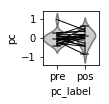

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(1,1)

sns.violinplot(x="pc_label",
               y="pc",
               data=bxplot_data,
               inner=None,
               color=".8",
               width=1,
               zorder=0)

sns.boxplot(x='pc_label',
            y='pc',
            data=bxplot_data,
            notch=True,
            fliersize=0,
            width=0.5, 
            zorder=1)

for i,s in enumerate(unmatched_nes_df.index):
    
    y = pca_nes[:, pcx][i]
    l = sample_labels['Case_mRNA'][s]
    
    if i%2 == 0:
        x = 0
        line = [(x,y)]
        
    else:
        x = 1
        line.append((x,y))
        (xs, ys) = zip(*line)
        
        if sample_labels['Case_mRNA'][s] in matched:                    
            ax.add_line(Line2D(xs, ys, ls='-', linewidth=1, color='k',alpha=1,zorder=2))
            
        else:
            ax.add_line(Line2D(xs, ys, ls='-', linewidth=1, color='k',alpha=1,zorder=2))
 

In [ ]:
fig = ax.get_figure()
filename = '../2.Plots/NACT_unmatched_ConsensusTME_PC%i_BxPlot.pdf' % pcx
fig.savefig(filename, bbox_inches='tight')

### Stastical analysis of pre vs post NACT PCs

In [25]:
p_values = []
for pcx in range(7):

    pre = []
    pos = []    
    for i,s in enumerate(unmatched_nes_df.index):
        
        x = pca_nes[:, pcx][i]
        l = sample_labels['Case_mRNA'][s]

        if sample_labels['NACT'][s] == 'Untreated':
            pre.append(x)

        else:
            pos.append(x)
            
    print(str(pcx)+"\n")
    
    n1 = scipy.stats.shapiro(pre)[1]
    n2 = scipy.stats.shapiro(pos)[1]
    
    n3 = scipy.stats.normaltest(pre)[1]
    n4 = scipy.stats.normaltest(pos)[1]
    
    n5 = scipy.stats.anderson(pre)
    n6 = scipy.stats.anderson(pos)
    
    if min([n1,n2]) < 0.05: # it's not normal

        print("NOT normal")

        h1 = scipy.stats.levene(pre, pos)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
            #print(h1)
        else:
            print("HOMOscedastic\n")

    else:

        print("Normal")

        h1 = scipy.stats.bartlett(pre,pos)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
        else:
            print("HOMOscedastic\n")
            
    if min([n1,n2,h1]) < 0.05:

        print("WILCOXON")

        print(scipy.stats.wilcoxon(pre,pos))
        
        stat, p_val = scipy.stats.wilcoxon(pre,pos)

    else:

        print("anderson")

        print(n5[0], n5[1])
        print(n6[0], n6[1])
        print("\n")

        print("PAIRED T-TEST")
        print(scipy.stats.ttest_rel(pre,pos))

        print("\n")
        
        stat, p_val = scipy.stats.ttest_rel(pre,pos)
                
    p_values.append((str(pcx),stat,p_val))

0

NOT normal
HOMOscedastic

WILCOXON
WilcoxonResult(statistic=86.0, pvalue=0.7172177958043885)
1

Normal
HOMOscedastic

anderson
0.44493301016004594 [0.505 0.575 0.69  0.804 0.957]
0.3370291427155756 [0.505 0.575 0.69  0.804 0.957]


PAIRED T-TEST
Ttest_relResult(statistic=-0.6933459945090075, pvalue=0.4969425561025871)


2

NOT normal
HOMOscedastic

WILCOXON
WilcoxonResult(statistic=87.0, pvalue=0.7475000777680043)
3

Normal
HOMOscedastic

anderson
0.5415423461760867 [0.505 0.575 0.69  0.804 0.957]
0.3381563641596621 [0.505 0.575 0.69  0.804 0.957]


PAIRED T-TEST
Ttest_relResult(statistic=2.538588410167878, pvalue=0.02058478020153569)


4

Normal
HOMOscedastic

anderson
0.4408886257964788 [0.505 0.575 0.69  0.804 0.957]
0.5521387175016308 [0.505 0.575 0.69  0.804 0.957]


PAIRED T-TEST
Ttest_relResult(statistic=1.4446899497545649, pvalue=0.16572838712392482)


5

Normal
HOMOscedastic

anderson
0.2748051041446544 [0.505 0.575 0.69  0.804 0.957]
0.29311100286899716 [0.505 0.575 0.69  

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % 

In [ ]:
p_values

# End script